# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
%matplotlib inline
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
#The resulting plots will then also be stored in the notebook document.

import warnings
#This is the base class of all warning category classes. It is a subclass of Exception.

warnings.filterwarnings("ignore")
# ignore all the warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3  # For forming connection between the code and sql
import time
import os

## [1] Reading Data

In [2]:
#os.chdir('/home/kushagra/Desktop/Excercise/reviews_dataset')
connection = sqlite3.connect('/home/kushagra/Desktop/Excercise/reviews_dataset/database.sqlite')
data = pd.read_sql_query('''SELECT*FROM Reviews where score != 3 LIMIT 10000''',connection)

def positive_negative(x):
    if x<3:
        return 0
    return 1

filter_data = data['Score'].map(positive_negative)
data['Score'] = filter_data
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# SQL Query for Total Number of users i.e. unique userid's
unique = pd.read_sql_query('''SELECT *,COUNT(*) FROM Reviews GROUP BY UserId HAVING COUNT(*)>1''',connection)
#group by Groups together same UserId's, used with count

In [4]:
print(unique.shape) #Total Number of users i.e. unique userid's
print(unique['COUNT(*)'].sum())  # Total number of reviews i.e. unique
redundant = pd.read_sql_query('''select count(*) from Reviews''',connection)
print("Percentage of redundant data = ",(1-unique['COUNT(*)'].sum()/redundant['count(*)'].sum())*100)
unique[unique['UserId']=="AR5J8UI46CURR"]

(80668, 11)
393063
Percentage of redundant data =  30.854035682746538


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,COUNT(*)
75417,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,5


#  Exploratory Data Analysis

## [2] Data Cleaning: Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [5]:
x = pd.read_sql_query('''select * from Reviews where UserId = "AR5J8UI46CURR"''',connection)
x
# As you can see there is redundancy.
# This redundancy is due to the fact that one product has many variations for eg:-
# A speaker of same model might have different colors, they will share the same review. Hence this redundancy.
# We need to remove this redundancy because we don't want our data to be baised.
# There might be more other redundancy, you need to figure these redundacy on you own.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


As can be seen above the same user has multiple reviews of the with the same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text and on doing analysis it was found that 

ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)

ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [6]:
# There is another type of redundancy. i.e. HelpfulnessNumerator cannot be greater than HelpfulnessDenominator
x = pd.read_sql_query('''select * from Reviews Where "HelpfulnessNumerator">"HelpfulnessDenominator"''',connection)
x

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [7]:
# Need to remove the redundancy discovered above
# Before we remove the redundancy we need to sort the data, then we can use pandas inbuit fn to remove redundancy
sorted_data = data.sort_values('ProductId',axis=0,ascending=True,kind='quicksort',na_position='last') #na_position is the position of NaN data

In [8]:
non_redundant = sorted_data.drop_duplicates(subset={"UserId","Time","ProfileName","Text"},keep='first')
non_redundant = non_redundant[non_redundant['HelpfulnessNumerator']<=non_redundant['HelpfulnessDenominator']]

In [9]:
print(non_redundant.shape)

(9564, 10)


In [10]:
# Percentage of data remained
print("Percentage of data remained = ",(non_redundant["Id"].size*1.0/data["Id"].size*1.0)*100)

Percentage of data remained =  95.64


In [11]:
print(non_redundant.shape)
print(pd.value_counts(non_redundant['Score']))

(9564, 10)
1    7976
0    1588
Name: Score, dtype: int64


In [12]:
# Remove the entries that have missing values i.e. Nan Score
print(non_redundant.isna().any())
non_redundant.dropna(axis=0,inplace=True)

Id                        False
ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                   False
Text                      False
dtype: bool


## [3].  Text Preprocessing.

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags and html links
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and remove not alpha-numeric(words made up of alphabets+numbers)
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Perform decontraction
6. Convert the word to lowercase
7. Remove Stopwords
8. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

### [1]. Removing HTML links and tags

In [13]:
# Removing html links
# We need to regular expression package in python to remove html's as the re package has functions that can search for a pattern in text.
# So we will search for html links and susitute them with backspace.
import re
# Here is an example with link
print(non_redundant['Text'].values[0])

print("\n",'='*50,'\n')
print(re.sub(r"http\S+","",non_redundant['Text'].values[0]))
# r is used for creating regular expressions, \S used for non-whitespace
# + used for sequence i.e. \S+   ----> sequence of non-whitespace.
# sub is for subsituting the following pattern with "" .

We have used the Victor fly bait for 3 seasons.  Can't beat it.  Great product!


We have used the Victor fly bait for 3 seasons.  Can't beat it.  Great product!


| Code	   | Meaning                                 |
| ---      | ---                                     |
| \d	   | a digit                                 |  
| \D	   | a non-digit                             |
| \s	   | whitespace (tab, space, newline, etc.)  |
| \S	   | non-whitespace                          |      
| \w	   | alphanumeric                            |  
| \W	   | non-alphanumeric                        |       

| Code	   |Meaning                                              |
| ---      | ---                                                 |
| ^	       |start of string, or line                             |                 
| $	       |end of string, or line                               |  
| \A	   |start of string                                      |           
| \Z	   |end of string                                        |        
| \b	   |empty string at the beginning or end of a word       |                     
| \B	   |empty string not at the beginning or end of a word   |


> ## Repetition
> There are five ways to express repetition in a pattern. A pattern followed by the metacharacter * is repeated zero or more times (allowing a pattern to repeat zero times means it does not need to appear at all to match). Replace the * with + and the pattern must appear at least once. Using ? means the pattern appears zero or one time. For a specific number of occurrences, use {m} after the pattern, where m is replaced with the number of times the pattern should repeat. And finally, to allow a variable but limited number of repetitions, use {m,n} where m is the minimum number of repetitions and n is the maximum. Leaving out n ({m,}) means the value appears at least m times, with no maximum.

In [14]:
# Removing html tags
# We need to use BeautifulSoup from bs4
#BeautifulSoap is used for html processing
from bs4 import BeautifulSoup


print(non_redundant['Text'].values[0])
print("\n",'='*50,'\n')

print(BeautifulSoup(non_redundant['Text'].values[0]))
# As you can see here BeautifulSoup converts the text into standard html format.
# This will also help us remove all the html standard tags
print("\n",'='*50,'\n')

text = BeautifulSoup(non_redundant['Text'].values[0])
text = text.get_text() # Extracting text from the html object.
print(text)
# As you can see all the tags have been removed.

We have used the Victor fly bait for 3 seasons.  Can't beat it.  Great product!


<html><body><p>We have used the Victor fly bait for 3 seasons.  Can't beat it.  Great product!</p></body></html>


We have used the Victor fly bait for 3 seasons.  Can't beat it.  Great product!


### [2.] Removing all Special Characters and Punctuations

In [15]:
# Removing all the special characters
# Here is a regex to match a string of characters that are not a letters or numbers:
print(re.sub('[^A-Za-z0-9]+',' ',non_redundant['Text'].values[0]))# the re will search for character that does not contain A-Za-z0-9.
# A character set can also be used to exclude specific characters.
#The special marker ^ means to look for characters not in the set following.

# As you can see "$[...]" is removed. All special characters are removed.

We have used the Victor fly bait for 3 seasons Can t beat it Great product 


### [3.] Removing Alfa-Numeric letters

In [16]:
# Removing Alfa-Numeric Words
print(re.sub('\S*\d\S*','',non_redundant['Text'].values[0]))  # \S*  --> Means all character excluding white spaces might occurs 0 or more times
# \d  ----> digit must occur one time.
#\S*\d\S*  ---> eg:- saj3434jkdsd
#This will remove all digits and string with digits.

# As you can see all alpha-numeric letters are removed.

We have used the Victor fly bait for  seasons.  Can't beat it.  Great product!


### [4.] Perform Decontraction

In [17]:
# We need to replace words that use short forms such as --> I'm or won't or couldn't or wouldn't etc. to their full form
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

print(non_redundant['Text'].values[900])
# As we can there is "'t" in our sentence. we need to replace all these words to their original words.
print("\n",'='*50,'\n')

# For this to fully work first we need to convert the sentence to lower case.
# Anyways we can are going to use it here as this is just an example.
print(decontraction(non_redundant['Text'].values[900]))

Mrs. May's pumpkin crunch is a great snack. For those of you watching calories and intake, be aware that the 2oz portions are two servings. Most of Mrs. May's products are great, but with the fat at 11g per serving, i find it's not a complete guilt free snack. However, the pumpkin seed crunch has 9gms of protein per serving vs. the usual 4gms in their other snacks. So if you're monitoring your intake and want to indulge in these now and then, the pumpkin seed crunch is the healthiest option of the bunch.<br /><br />That said, they are all tasty and certainly not bad for you, just a little high in fat if you're watching your weight.


Mrs. May is pumpkin crunch is a great snack. For those of you watching calories and intake, be aware that the 2oz portions are two servings. Most of Mrs. May is products are great, but with the fat at 11g per serving, i find it is not a complete guilt free snack. However, the pumpkin seed crunch has 9gms of protein per serving vs. the usual 4gms in their o

### [5.] Converting to Lower Case

In [18]:
def lower_case(sentence):
    sentence = ' '.join(e.lower() for e in sentence.split())
    return sentence

print(lower_case(non_redundant['Text'].values[900]))

mrs. may's pumpkin crunch is a great snack. for those of you watching calories and intake, be aware that the 2oz portions are two servings. most of mrs. may's products are great, but with the fat at 11g per serving, i find it's not a complete guilt free snack. however, the pumpkin seed crunch has 9gms of protein per serving vs. the usual 4gms in their other snacks. so if you're monitoring your intake and want to indulge in these now and then, the pumpkin seed crunch is the healthiest option of the bunch.<br /><br />that said, they are all tasty and certainly not bad for you, just a little high in fat if you're watching your weight.


### [6.] Removing Stop Words

In [19]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have removed in the 1st step
# https://gist.github.com/sebleier/554280

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
# Creating sets of stop keywords

def rm_stop_words(sentence):
    sentence = ' '.join(e for e in sentence.split() if e not in stopwords)
    return sentence

print(non_redundant['Text'].values[900])
print("\n",'='*50,'\n')
print(rm_stop_words(non_redundant['Text'].values[900]))

Mrs. May's pumpkin crunch is a great snack. For those of you watching calories and intake, be aware that the 2oz portions are two servings. Most of Mrs. May's products are great, but with the fat at 11g per serving, i find it's not a complete guilt free snack. However, the pumpkin seed crunch has 9gms of protein per serving vs. the usual 4gms in their other snacks. So if you're monitoring your intake and want to indulge in these now and then, the pumpkin seed crunch is the healthiest option of the bunch.<br /><br />That said, they are all tasty and certainly not bad for you, just a little high in fat if you're watching your weight.


Mrs. May's pumpkin crunch great snack. For watching calories intake, aware 2oz portions two servings. Most Mrs. May's products great, fat 11g per serving, find not complete guilt free snack. However, pumpkin seed crunch 9gms protein per serving vs. usual 4gms snacks. So monitoring intake want indulge then, pumpkin seed crunch healthiest option bunch.<br />

### [7.] Stemming the words

In [20]:
# As snow ball stemming is better than porter stemming we are going to use snow ball stemming
from nltk.stem import SnowballStemmer
print(" ".join(SnowballStemmer.languages)) # languages supported by th snowball stemming

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [21]:
stemmer = SnowballStemmer('english') # Selecting english language for stemming
stemmer.stem('manly')

'man'

### Now we need to use all these technique at one to apply at our Amazon Fine Food DataSet

In [22]:
from tqdm import tqdm
import pdb
# This package is used for visualizing loading status bar
# https://gist.github.com/sebleier/554280

preprocessed_review = []
for review in tqdm(non_redundant['Text'].values):
    review = re.sub(r'http\S+','',review)
    review = BeautifulSoup(review).get_text()
    review = re.sub('[^A-Za-z0-9]+',' ',review)  # This line of code should be carefully written.
    # If ' ' space is not given in subsituition, then the words will cramp
    # If * is used instead of + , then all letter will have spacing
    review = re.sub('\S*\d\S*','',review)
    review = ' '.join(e.lower() for e in review.split() if e.lower() not in stopwords) #Removing Stop words and loweri casing letter at same time.
    review = decontraction(review)
    preprocessed_review.append(' '.join(list(map(stemmer.stem, review.split(' ')))))

100%|██████████| 9564/9564 [00:08<00:00, 1184.32it/s]


### __*Run the below cell if you don't want to stem your text.*__

In [23]:
print(preprocessed_review[1500])
print('\n',len(preprocessed_review))
print(type(preprocessed_review))

chip truli amaz light crisp great tast nice textur natur low fat sodium need say recent bought bag regular groceri store beliv tast bud excit saw amazon decid buy case

 9564
<class 'list'>


# [4.] Featurization

# Word2Vector

In [24]:
# If we want to use w2v we need to convert our data to tokens i.e. list of list.
# Here each ducument will be a list whose words are element of the list.
# All the documents will be contained in a bigger list i.e. Corpous
corpus=[]
for document in preprocessed_review:
    corpus.append(document.split(' '))
    
print(corpus[10])
print(len(corpus))

['cat', 'third', 'favorit', 'food', 'great', 'stuff', 'gravi', 'thick', 'food', 'look', 'like', 'bit', 'steak', 'slick', 'friend', 'cat', 'lick', 'bowl', 'clean', 'everi', 'time', 'want', 'send', 'discount', 'much', 'stuff', 'buy', 'buy', 'case', 'give', 'idea']
9564


In [25]:
# Here is a really good article on Word2Vector
# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XR0cft9fiXJ
from gensim.models import Word2Vec  

model = Word2Vec(corpus,size=150,window=10,min_count=5,workers=4)
# size is number of dimensions of vector that you want to build
# window is the maximum distance between two similar words
# min_count is the minimum number of times the word must appear in corpus
# workers is the numbers of cpu that you want to use

# Read the above article to know about these arguments if full detail

In [26]:
print(model.wv.most_similar('bad',topn=15)) #topn specifes number of examples in output.

[('said', 0.892447292804718), ('know', 0.8905301094055176), ('sure', 0.8825110197067261), ('say', 0.8797614574432373), ('think', 0.8752697110176086), ('someth', 0.8732505440711975), ('els', 0.8475999236106873), ('care', 0.8411951661109924), ('peopl', 0.8349349498748779), ('thought', 0.8339225053787231), ('may', 0.8330485224723816), ('probabl', 0.8288842439651489), ('star', 0.826762855052948), ('not', 0.8206561803817749), ('though', 0.8180485963821411)]


In [27]:
print(model.wv.most_similar('good'))
print('\n')
print(model.wv.similarity('good','tasti'))
print('\n')
print(model.wv.most_similar('smell'))

[('pretti', 0.9051674604415894), ('realli', 0.8935757875442505), ('bummer', 0.8875270485877991), ('expect', 0.8845406770706177), ('surpris', 0.8495656847953796), ('opinion', 0.8307005763053894), ('not', 0.8302484750747681), ('tast', 0.8246794939041138), ('caramel', 0.8234350681304932), ('alright', 0.8210468888282776)]


0.73983395


[('say', 0.8466334939002991), ('sip', 0.8324472904205322), ('underton', 0.8275343179702759), ('leav', 0.8244538903236389), ('earthi', 0.8226197361946106), ('burnt', 0.8187879323959351), ('even', 0.8183469176292419), ('weak', 0.8173315525054932), ('experi', 0.8167448043823242), ('not', 0.8160738348960876)]


In [28]:
print(len(model.wv.vocab)) # Total number of words in our vocabulary
print(type(model.wv.vocab))
print("Some words :",list(model.wv.vocab)[1000:1010])
vocabulary = model.wv.vocab

4234
<class 'dict'>
Some words : ['offer', 'benefit', 'genet', 'modifi', 'cholesterol', 'peanut', 'low', 'satur', 'hunger', 'crave']


> **Remember, More the data better the Word2Vec perfroms.**<br>
__Here Word2Vec will not perform very well as data in less__

## [4.1] Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(data):
    bow = CountVectorizer(min_df=7)
    bow = bow.fit(data)
    #https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
    #http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    return bow

## [4.2] TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(data):
    tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=5)
    tfidf = tfidf.fit(data)
    return tfidf

## [4.3] Average Word2Vec

In [31]:
# Compute Average Word2Vector
def average_w2v(data):
    avg_list = []
    for review in tqdm(data):
        vec = np.zeros(150)
        count=0
        for word in review.split(' '):
            try:
                vec += model.wv[word]
                count+=1
            except:
                pass
        if count != 0:
            vec =vec/count
            avg_list.append(vec)
        else:
            avg_list.append(np.zeros(150))
            
            
    print("Total number of the vector : ",len(avg_list))  #Length of the list
    print("Dimension of Vector : ",len(avg_list[1])) # Length of average vector
    return np.array(avg_list)

## [4.4] Weighted W2V TFIDF

In [32]:
def tfidf_w_w2v(data, train_data=False, test_data=False):
    vocabulary_tfidf = tfidf.get_feature_names()
    if train_data==True:
        tfidf_data=train_cv_tfidf
    elif test_data==True:
        tfidf_data=test_tfidf
    else:
        print("All parameters are False!")
        return
    row, counter=0,0
    tfidf_w_w2v_list = []
    for sentence in tqdm(data):
        cnt_words=0.0
        weighted_tfidf = np.zeros(150)
        for word in sentence.split(' '):
            try:
                vec = model.wv[word]
                tfidf_ = tfidf_data[row,vocabulary_tfidf.index(word)]
                weighted_tfidf += tfidf_*vec
                cnt_words+=tfidf_
            except:
                pass
        if cnt_words !=0:
            tfidf_w_w2v_list.append(weighted_tfidf/cnt_words)
        else:
            tfidf_w_w2v_list.append(np.zeros(150))
            counter+=1
        row +=1
    print("Total Number of Null review : ", counter)
    return np.array(tfidf_w_w2v_list)

# [5] Applying Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import scikitplot.metrics as skplt
def GridSearch(train_data, train_label,param_grid_ ,scoring='f1'):
    gscv = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_, scoring = 'f1', return_train_score=True, n_jobs=4)
    gscv.fit(train_data, train_label)
    best_C = gscv.best_params_
    return best_C.get('C')

In [34]:
def LR(train_data, test_data, train_label, test_label, best_C, penalty_='l2', class_weight_={}, top_feature=True):
    auc_train, auc_test = [], []
    lr = LogisticRegression(penalty=penalty_, C=best_C, class_weight= class_weight_, multi_class='ovr')
    lr.fit(train_data, train_label)
                
     #########################################Top Features############################################
    if top_feature==True:
        weight = lr.coef_
        weight_=weight.ravel()
        weight_sorted = np.argsort(weight_)
        number_of_element = weight_sorted.shape[0]-1
        weight_top_10_index_positive = weight_sorted[number_of_element-10:number_of_element]
        weight_top_10_index_negative = weight_sorted[0:10]
        top_10_feature_index_n, top_10_feature_index_p = [], []
        
        for i in weight_top_10_index_positive:
            if i>number_of_element:
                i = i-number_of_element
                top_10_feature_index_p.append(i)
            else:
                top_10_feature_index_p.append(i)
                
        for i in weight_top_10_index_negative:
            if i>number_of_element:
                i = i-number_of_element
                top_10_feature_index_n.append(i)
            else:
                top_10_feature_index_n.append(i)  
                
            
  ##################################Plotting Curve#################################################
    train_probab = lr.predict_proba(train_data)[:,1]
    test_probab = lr.predict_proba(test_data)[:,1]
    fpr_train, tpr_train, threshold_train = roc_curve(train_label, train_probab)
    fpr_test, tpr_test, threshold_test = roc_curve(test_label, test_probab)
    plt.plot(fpr_train, tpr_train, label='Train : '+str(roc_auc_score(train_label, train_probab)), marker=',')
    plt.plot(fpr_test, tpr_test, label='Test : '+str(roc_auc_score(test_label, test_probab)), marker=',')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Reciver Operating Curve")
    plt.grid()
    plt.legend()
    plt.show()
    
    
     ##################################Plotting Confusion Matrix##############################################
    
    
    test_predicted = lr.predict(test_data)
    skplt.plot_confusion_matrix(train_label, lr.predict(train_data))
    plt.title("Train Confusion Matrix")
    plt.show()
    skplt.plot_confusion_matrix(test_label, test_predicted)
    plt.title("Test Confusion Matrix")
    plt.show()
    print("Accuracy Score of LR is: ", (accuracy_score(test_label, test_predicted))*100)
    if top_feature==True:
        return top_10_feature_index_p, top_10_feature_index_n, weight, roc_auc_score(test_label, test_probab)*100
    else :
        return roc_auc_score(test_label, test_probab)*100

In [35]:
preprocessed_df = non_redundant.copy()
preprocessed_df['Text'] = preprocessed_review
print(preprocessed_df.shape)
print(preprocessed_df['Score'].value_counts())

(9564, 10)
1    7976
0    1588
Name: Score, dtype: int64


In [36]:
# Time Base Splitting
preprocessed_df = preprocessed_df.sort_values('Time',axis=0,ascending=True,kind='quicksort',na_position='last')

In [37]:
from sklearn.model_selection import train_test_split
train_cv, test = train_test_split(preprocessed_df, random_state = 0 ,test_size=0.3)

## [5.1] Logistic Regression on BOW,<font color='red'> SET 1</font>

In [38]:
from sklearn.preprocessing import Normalizer
# computing BOW
bow = bag_of_words(train_cv['Text'])
feature = np.array(bow.get_feature_names())
train_cv_bow = bow.transform(train_cv['Text'])
test_bow = bow.transform(test['Text'])
print(train_cv_bow.shape, train_cv['Score'].shape)
print(test_bow.shape)
print(train_cv['Score'].value_counts())
print(type(train_cv_bow))
print(feature[0:10])

# Normalizing data
train_cv_bow = Normalizer().fit_transform(train_cv_bow)
test_bow = Normalizer().fit_transform(test_bow)

(6694, 2710) (6694,)
(2870, 2710)
1    5570
0    1124
Name: Score, dtype: int64
<class 'scipy.sparse.csr.csr_matrix'>
['abil' 'abl' 'absolut' 'absorb' 'acacia' 'acai' 'accept' 'accid'
 'accident' 'accord']


### [5.1.1] Applying Logistic Regression with L1 regularization on BOW,<font color='red'> SET 1</font>

In [39]:
l=[{'C' : [10**4, 10**3, 10**2, 10, 10**-1, 10**-2, 10**-3, 10**-2, 10**-3, 10**-4]}]
C_bow = GridSearch(train_cv_bow, train_cv['Score'],l)

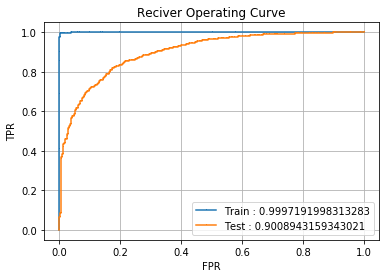

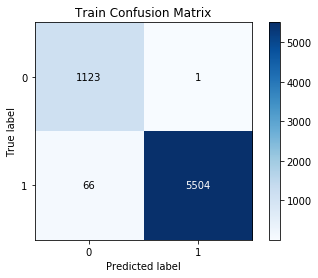

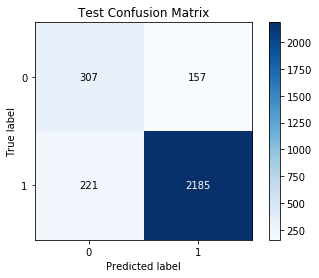

Accuracy Score of LR is:  86.82926829268293


In [40]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
idx_bow_l1_p, idx_bow_l1_n, weight_bow_l1, auc_bow_l1 = LR(train_cv_bow, test_bow, train_cv['Score'], test['Score'], C_bow ,penalty_='l1', class_weight_=cw)

#### [5.1.1.1] Calculating sparsity on weight vector obtained using L1 regularization on BOW,<font color='red'> SET 1</font>

In [41]:
print("Total zero elements in Matrix : ", weight_bow_l1.shape[1] - np.count_nonzero(weight_bow_l1.ravel()))

Total zero elements in Matrix :  1426


### [5.1.2] Applying Logistic Regression with L2 regularization on BOW,<font color='red'> SET 1</font>

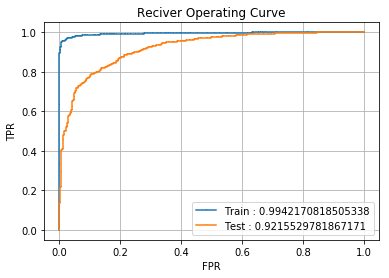

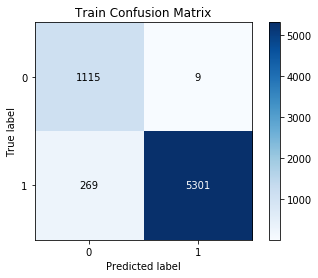

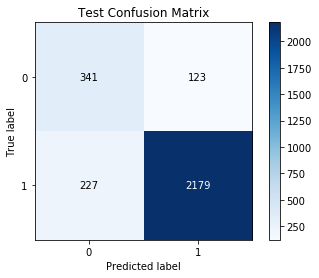

Accuracy Score of LR is:  87.8048780487805


In [42]:
idx_bow_l2_p, idx_bow_l2_n, weight_bow_l2, auc_bow_l2 = LR(train_cv_bow, test_bow, train_cv['Score'], test['Score'], best_C=C_bow ,penalty_='l2', class_weight_=cw)

#### [5.1.2.1] Calculating sparsity on weight vector obtained using L2 regularization on BOW,<font color='red'> SET 1</font>

In [43]:
print(weight_bow_l2.shape)
print("Total zero elements in Matrix : ", weight_bow_l2.shape[1] - np.count_nonzero(weight_bow_l2.ravel()))

(1, 2710)
Total zero elements in Matrix :  0


#### [5.1.2.1] Performing pertubation test (multicollinearity check) on BOW,<font color='red'> SET 1</font>

In [44]:
e1 = 10**-6
train_cv_bow_dense = train_cv_bow.toarray()
train_cv_bow_dense = train_cv_bow_dense+e1
C_bow_p = GridSearch(train_cv_bow_dense, train_cv['Score'], param_grid_=l)

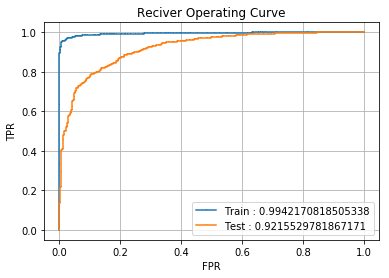

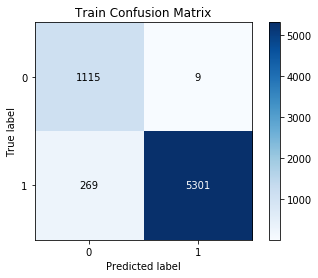

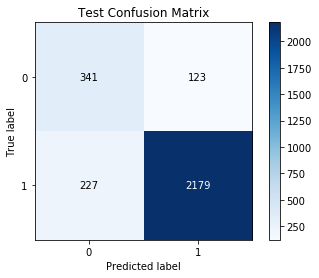

Accuracy Score of LR is:  87.8048780487805


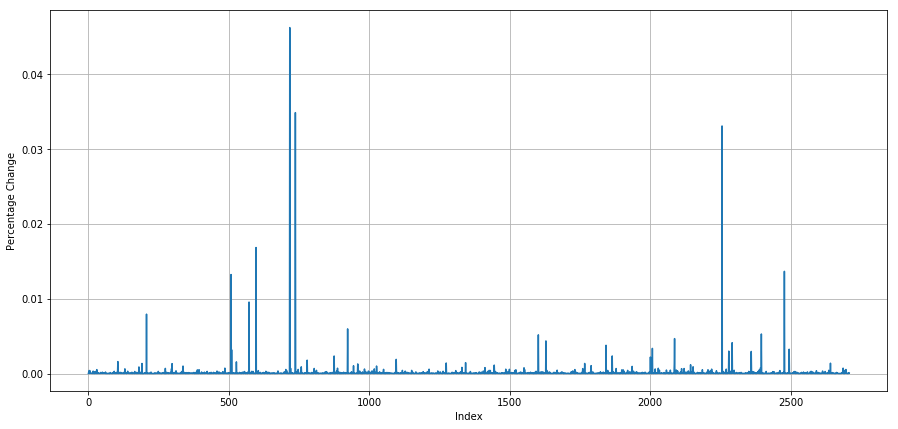

0  percentile : -11.995873035636947 0  percentile : -11.995873238797984
10  percentile : -2.6944241055050377 10  percentile : -2.694424221236314
20  percentile : -1.489658746864468 20  percentile : -1.4896586804843566
30  percentile : -0.7706445736920415 30  percentile : -0.7706444991727175
40  percentile : -0.21476291004542286 40  percentile : -0.21476273801032336
50  percentile : 0.2228927437198842 50  percentile : 0.22289273803967719
60  percentile : 0.6429990783935218 60  percentile : 0.6429995074152591
70  percentile : 1.0882077668388193 70  percentile : 1.0882077709939555
80  percentile : 1.5622451859248436 80  percentile : 1.5622455786329983
90  percentile : 2.397706020412523 90  percentile : 2.397706499591638


In [45]:
test_bow_dense = test_bow.toarray()
test_bow_dense = test_bow_dense+e1

idx_bow_l1_p_e, idx_bow_l1_n_e, weight_bow_l2_p, auc_bow_l2_p = LR(train_cv_bow_dense, test_bow_dense, train_cv['Score'], test['Score'],best_C = C_bow_p,penalty_='l2', class_weight_=cw)

e = 10**-8

weight_bow_l2_e =weight_bow_l2+ e

weight_bow_l2_pe = weight_bow_l2_p+e

percentage = (weight_bow_l2_e-weight_bow_l2_pe)/weight_bow_l2_e
percentage_change = np.array(list(map(abs, percentage*100)))

plt.close()
plt.figure(figsize=(15,7))
sns.lineplot(np.arange(0, weight_bow_l2_pe.shape[1]), percentage_change.ravel())
plt.xlabel('Index')
plt.ylabel('Percentage Change')
plt.grid()
plt.show()

l=range(0,100,10)

for i in l:
    print(i, " percentile :", np.percentile(weight_bow_l2_e.ravel(), i), end=" ")
    print(i, " percentile :", np.percentile(weight_bow_l2_pe.ravel(), i))


### [5.1.3] Feature Importance on BOW,<font color='red'> SET 1</font>

#### [5.1.3.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [46]:
print(feature.shape)
print(feature[idx_bow_l1_p])

(2710,)
['auto' 'im' 'skeptic' 'tax' 'grill' 'bergamot' 'relief' 'finger' 'carri'
 'worri']


#### [5.1.3.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [47]:
print(feature[idx_bow_l1_n])

['yuck' 'dead' 'terribl' 'hershey' 'blah' 'worst' 'opt' 'deliber' 'shame'
 'flat']


## [5.2] Logistic Regression on TFIDF,<font color='red'> SET 2</font>

### [5.2.1] Applying Logistic Regression with L1 regularization on TFIDF,<font color='red'> SET 2</font>

In [48]:
# computing tfidf
tfidf = tf_idf(train_cv['Text'])
feature = np.array(tfidf.get_feature_names())
train_cv_tfidf = tfidf.transform(train_cv['Text'])
test_tfidf = tfidf.transform(test['Text'])
print(train_cv_tfidf.shape, train_cv['Score'].shape)
print(test_tfidf.shape)
print(train_cv['Score'].value_counts())
print(type(train_cv_tfidf))
print(feature[0:10])

# Normalizing Data

train_cv_tfidf = Normalizer().fit_transform(train_cv_tfidf)
test_tfidf = Normalizer().fit_transform(test_tfidf)

(6694, 8936) (6694,)
(2870, 8936)
1    5570
0    1124
Name: Score, dtype: int64
<class 'scipy.sparse.csr.csr_matrix'>
['abil' 'abl' 'abl buy' 'abl eat' 'abl find' 'abl get' 'abl give'
 'abl make' 'abl order' 'abl purchas']


In [49]:
l=[{'C' : [10**4, 10**3, 10**2, 10, 10**-1, 10**-2, 10**-3, 10**-2, 10**-3, 10**-4]}]
C_tfidf = GridSearch(train_cv_tfidf, train_cv['Score'],l)

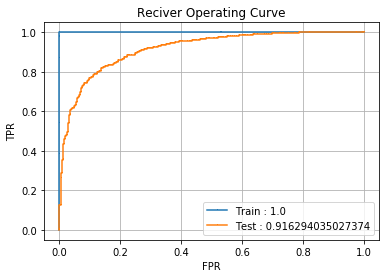

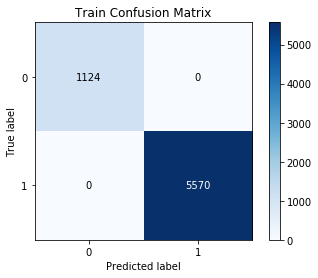

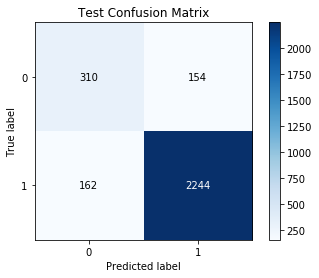

Accuracy Score of LR is:  88.98954703832752


In [50]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
idx_tfidf_l1_p, idx_tfidf_l1_n, weight_tfidf_l1, auc_tfidf_l1 = LR(train_cv_tfidf, test_tfidf, train_cv['Score'], test['Score'], best_C=C_tfidf ,penalty_='l1', class_weight_=cw)

### [5.2.2] Applying Logistic Regression with L2 regularization on TFIDF,<font color='red'> SET 2</font>

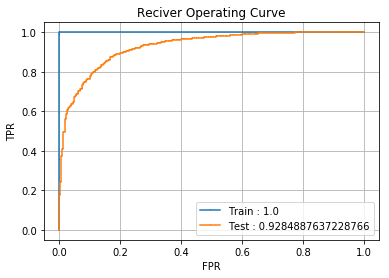

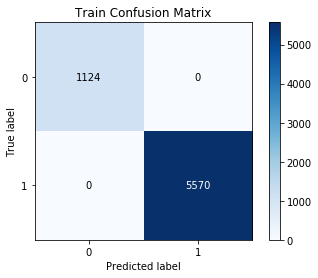

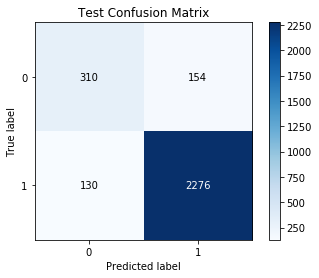

Accuracy Score of LR is:  90.10452961672473


In [51]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
idx_tfidf_l2_p, idx_tfidf_l2_n, weight_tfidf_l2, auc_tfidf_l2 = LR(train_cv_tfidf, test_tfidf, train_cv['Score'], test['Score'], best_C=C_tfidf ,penalty_='l2', class_weight_=cw)

### [5.2.3] Feature Importance on TFIDF,<font color='red'> SET 2</font>

#### [5.2.3.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [52]:
print(feature.shape)
print(feature[idx_tfidf_l1_p])

(8936,)
['high recommend' 'excel' 'worri' 'happi' 'not bitter' 'nutrit fact'
 'amaz' 'best' 'nice' 'delici']


#### [5.2.3.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [53]:
print(feature.shape)
print(feature[idx_tfidf_l1_n])

(8936,)
['disappoint' 'yuck' 'high hope' 'not recommend' 'worst' 'terribl'
 'decept' 'switch back' 'dead' 'club soda']


## [5.3] Logistic Regression on AVG W2V,<font color='red'> SET 3</font>

### [5.3.1] Applying Logistic Regression with L1 regularization on AVG W2V<font color='red'> SET 3</font>

In [54]:
# computing average_w2v
train_cv_a_w2v = average_w2v(train_cv['Text'])
test_a_w2v = average_w2v(test['Text'])


train_cv_a_w2v = Normalizer().fit_transform(train_cv_a_w2v)
test_a_w2v = Normalizer().fit_transform(test_a_w2v)


print(train_cv_a_w2v.shape)
print(test_a_w2v.shape)
print(train_cv['Score'].value_counts())
print(type(train_cv_a_w2v))

 24%|██▍       | 691/2870 [00:00<00:00, 6905.74it/s]

Total number of the vector :  6694
Dimension of Vector :  150


100%|██████████| 2870/2870 [00:00<00:00, 6466.83it/s]

Total number of the vector :  2870
Dimension of Vector :  150
(6694, 150)
(2870, 150)
1    5570
0    1124
Name: Score, dtype: int64
<class 'numpy.ndarray'>


In [55]:
l=[{'C' : [10**4, 10**3, 10**2, 10, 10**-1, 10**-2, 10**-3, 10**-2, 10**-3, 10**-4]}]
C_aw2v = GridSearch(train_cv_a_w2v, train_cv['Score'],l)

/home/kushagra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


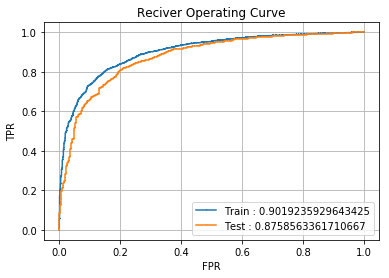

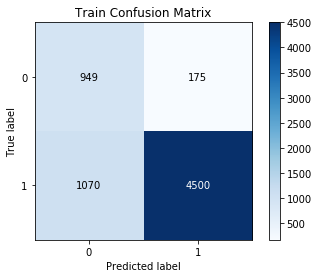

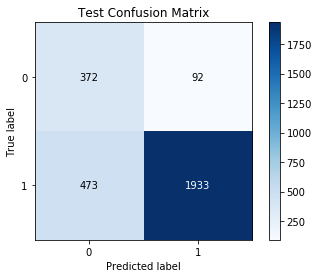

Accuracy Score of LR is:  80.31358885017421


In [56]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
auc_a_w2v_l1 = LR(train_cv_a_w2v, test_a_w2v, train_cv['Score'], test['Score'], best_C=C_aw2v ,penalty_='l1', class_weight_=cw, top_feature=False)

### [5.3.2] Applying Logistic Regression with L2 regularization on AVG W2V,<font color='red'> SET 3</font>

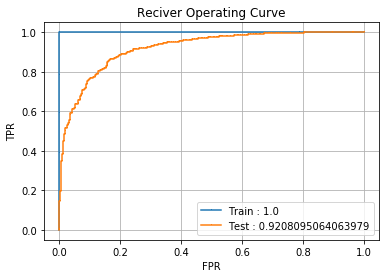

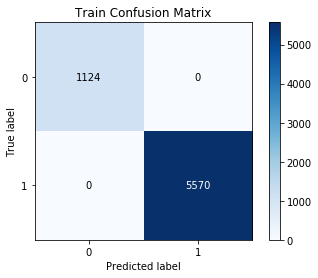

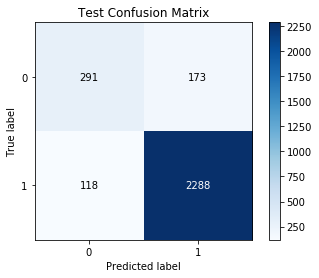

Accuracy Score of LR is:  89.86062717770035


In [57]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
auc_a_w2v_l2 = LR(train_cv_tfidf, test_tfidf, train_cv['Score'], test['Score'], best_C=C_aw2v ,penalty_='l2', class_weight_=cw, top_feature=False)

## [5.4] Logistic Regression on TFIDF W2V,<font color='red'> SET 4</font>

### [5.4.1] Applying Logistic Regression with L1 regularization on TFIDF W2V,<font color='red'> SET 4</font>

In [58]:
# computing tfidf_w2v
train_cv_tfidf_w_w2v = tfidf_w_w2v(train_cv['Text'], train_data=True)
test_tfidf_w_w2v = tfidf_w_w2v(test['Text'], test_data=True)


train_cv_tfidf_w_w2v = Normalizer().fit_transform(train_cv_tfidf_w_w2v)
test_tfidf_w_w2v = Normalizer().fit_transform(test_tfidf_w_w2v)


print(train_cv_tfidf_w_w2v.shape)
print(test_tfidf_w_w2v.shape)
print(type(train_cv_tfidf_w_w2v))


  0%|          | 14/2870 [00:00<00:21, 133.18it/s]

Total Number of Null review :  10


100%|██████████| 2870/2870 [00:16<00:00, 178.00it/s]

Total Number of Null review :  15
(6694, 150)
(2870, 150)
<class 'numpy.ndarray'>


In [59]:
l=[{'C' : [10**4, 10**3, 10**2, 10, 10**-1, 10**-2, 10**-3, 10**-2, 10**-3, 10**-4]}]
C_w_w2v = GridSearch(train_cv_tfidf_w_w2v, train_cv['Score'],l)

/home/kushagra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


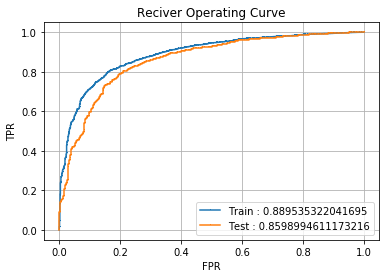

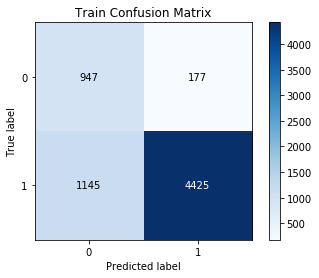

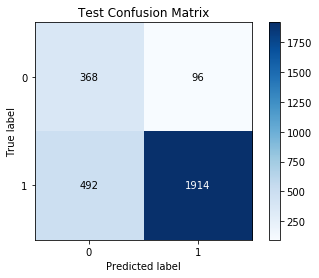

Accuracy Score of LR is:  79.51219512195122


In [60]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
auc_tfidf_w_w2v_l1 = LR(train_cv_tfidf_w_w2v, test_tfidf_w_w2v, train_cv['Score'], test['Score'], best_C=C_w_w2v ,penalty_='l1', class_weight_=cw, top_feature=False)

### [5.4.2] Applying Logistic Regression with L2 regularization on TFIDF W2V,<font color='red'> SET 4</font>

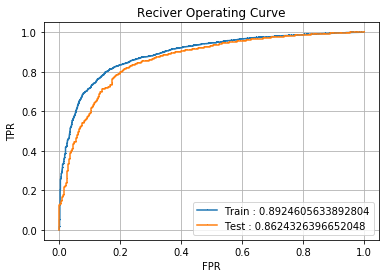

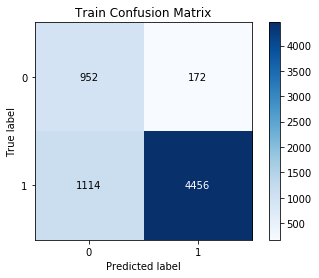

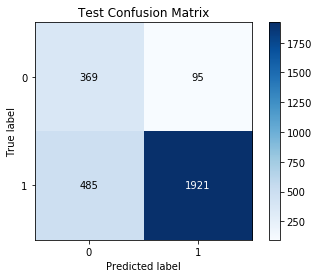

Accuracy Score of LR is:  79.79094076655052


In [61]:
cw = {0:5,1:1}  # Here positive example are very large(almost 5x) hence increasing wegiht of class 0
auc_tfidf_w_w2v_l2 = LR(train_cv_tfidf_w_w2v, test_tfidf_w_w2v, train_cv['Score'], test['Score'], best_C=C_w_w2v ,penalty_='l2', class_weight_=cw, top_feature=False)

# [6] Conclusions

In [62]:
# Now we need to draw PrettyTable of all of the above conclusions
from prettytable import PrettyTable
p_table = PrettyTable()
p_table.field_names = ['Vectorizer', 'Model', 'Regularization' , 'Hyper Parameter', 'AUC']
p_table.add_row(['BOW',' Linear Regression', 'l1' , C_bow, auc_bow_l1])
p_table.add_row(['BOW',' Linear Regression', 'l2' , C_bow, auc_bow_l2])
p_table.add_row(['TFIDF',' Linear Regression', 'l1' , C_tfidf, auc_tfidf_l1])
p_table.add_row(['TFIDF', 'Linear Regression', 'l2' , C_tfidf, auc_tfidf_l2])
p_table.add_row(['Average W2V', 'Linear Regression', 'l1' ,C_aw2v , auc_a_w2v_l1])
p_table.add_row(['Average W2V','Linear Regression', 'l2' , C_aw2v, auc_a_w2v_l2])
p_table.add_row(['TFIDF W2V', 'Linear Regression', 'l1' , C_w_w2v, auc_tfidf_w_w2v_l1])
p_table.add_row(['TFIDF W2V','Linear Regression', 'l2' , C_w_w2v, auc_tfidf_w_w2v_l2])
print(p_table)

+-------------+--------------------+----------------+-----------------+-------------------+
|  Vectorizer |       Model        | Regularization | Hyper Parameter |        AUC        |
+-------------+--------------------+----------------+-----------------+-------------------+
|     BOW     |  Linear Regression |       l1       |        10       | 90.08943159343022 |
|     BOW     |  Linear Regression |       l2       |        10       | 92.15529781867171 |
|    TFIDF    |  Linear Regression |       l1       |       100       |  91.6294035027374 |
|    TFIDF    | Linear Regression  |       l2       |       100       | 92.84887637228766 |
| Average W2V | Linear Regression  |       l1       |      10000      | 87.58563361710668 |
| Average W2V | Linear Regression  |       l2       |      10000      |  92.0809506406398 |
|  TFIDF W2V  | Linear Regression  |       l1       |      10000      | 85.98994611173217 |
|  TFIDF W2V  | Linear Regression  |       l2       |      10000      | 86.24326